## Project description
Market research on establishments in Los Angeles in order to attract investors. 

Idea: small robot-run cafe in Los Angeles.

### 1. Download the data 

In [3]:
! pip install -q usaddress

In [16]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt
import usaddress
import plotly.express as px
from plotly import graph_objects as go

In [5]:
# load in data file 
data = pd.read_csv('rest_data_us.csv', sep=',')

# study general information 
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
# study general information 
data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [8]:
data['chain'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9646    False
9647    False
9648    False
9649    False
9650    False
Name: chain, Length: 9651, dtype: bool

### 2. Data preprocessing

In [9]:
# drop duplicates and NAN values
data = data.drop_duplicates()

# drop rows with NA values in chain column 
data['chain'].dropna(inplace=True)

In [10]:
#cleaning address column
usaddress.parse(data.iloc[0]['address'])

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [11]:
#cleaning address column
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    #check the addresses "without street or number"
    else:
        return 'no street or number'

In [12]:
data['clean_address_check']=data.address.apply(cleaning_check)
#what streets caused problems
data[data['clean_address_check']=='no street or number']

,id,object_name,address,chain,object_type,number,clean_address_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [13]:
usaddress.parse(data.iloc[1888]['address'])

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

In [14]:
#manually handeling streets without street or number
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress

In [15]:
data['clean_address_final']=data.address.apply(cleaning_final)
data.sample(10)

,id,object_name,address,chain,object_type,number,clean_address_check,clean_address_final
4742,16528,DUNKIN' DONUTS,400 WORLD WAY # GT45,True,Fast Food,18,"400,WORLD","400 WORLD, Los Angeles,USA"
4213,15999,ANGEL MAID BAKERY,4542 CENTINELA AVE,True,Bakery,24,"4542,CENTINELA","4542 CENTINELA, Los Angeles,USA"
3139,14925,BELCAMPO MEAT CO.,8051 W 3RD ST,True,Restaurant,17,"8051,3RD","8051 3RD, Los Angeles,USA"
8120,19906,FRYING FISH,120 JAPANESE VLG PLZ MALL,False,Restaurant,7,"120,PLZ","120 PLZ, Los Angeles,USA"
5228,17014,THE ASSOCIATION,110 E 6TH ST,False,Restaurant,73,"110,6TH","110 6TH, Los Angeles,USA"
4752,16538,RALPHS MARKET #22,645 W 9TH ST,False,Restaurant,14,"645,9TH","645 9TH, Los Angeles,USA"
4067,15853,ISLANDS FINE BURGERS & DRINKS,10948 W PICO BLVD,True,Fast Food,133,"10948,PICO","10948 PICO, Los Angeles,USA"
8082,19868,#1 DONUT,8509 S FIGUEROA ST,False,Fast Food,21,"8509,FIGUEROA","8509 FIGUEROA, Los Angeles,USA"
5020,16806,J J DELI,640 S HILL ST # M-25,True,Restaurant,15,"640,HILL","640 HILL, Los Angeles,USA"
8723,20509,KAGAYA RESTAURANT,418 E 2ND ST,True,Restaurant,34,"418,2ND","418 2ND, Los Angeles,USA"


### 3. Data Analysis 

#### Investigate the proportions of the various types of establishments 

In [17]:
rest_by_type = data.pivot_table(index='object_type',values='id', aggfunc='count').reset_index()
rest_by_type.columns = ['type', 'count']
rest_by_type

,type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


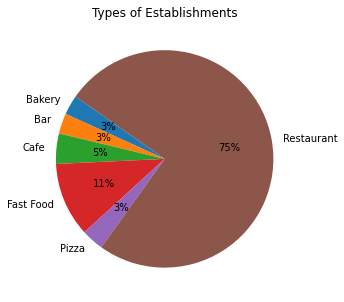

In [18]:
plt.figure(figsize=(10, 5))
plt.pie(rest_by_type['count'], labels=rest_by_type['type'],autopct='%0.f%%', startangle=145)
plt.title('Types of Establishments')
plt.show()

From the pie chart above it can be seen that:
75% of establishments are restaurants
11% of establishments are fast food
5% of establishments are cafe
and the rest have similar share: pizza, bar and bakery.

#### Investigate the proportions of chain and nonchain establishments 

In [20]:
rest_by_chain = data.pivot_table(index='chain',values='id', aggfunc='count').reset_index()
rest_by_chain.columns = ['chain', 'count']
rest_by_chain

,chain,count
0,False,5972
1,True,3676


Text(0.5, 1.0, 'Proportions of Chain and Nonchain Establishments')

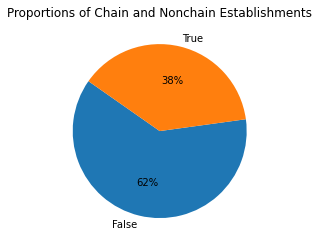

In [21]:
plt.pie(rest_by_chain['count'], labels=rest_by_chain['chain'],autopct='%0.f%%', startangle=145)
plt.title('Proportions of Chain and Nonchain Establishments')

From the figure above it can be seen in  that 62% of the establishments are nonchain estabilshments, while 38% of the establishments are chains.

#### Which type of establishment is typically a chain? 

In [22]:
rest_chains = data[data['chain']== True]
rest_chains_by_type = rest_chains.pivot_table(index='object_type', values='id', aggfunc='count').reset_index()
rest_chains_by_type.columns = ['type', 'count']
rest_chains_by_type.sort_values(by='count', ascending=False)

,type,count
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153
1,Bar,77


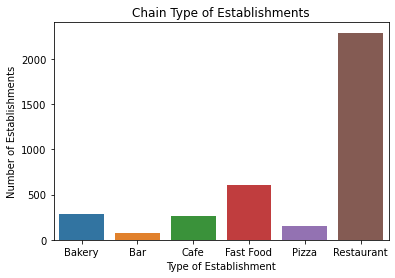

In [23]:
ax = sns.barplot(x="type", y="count", data=rest_chains_by_type)

plt.xlabel('Type of Establishment')
plt.ylabel('Number of Establishments')
plt.title('Chain Type of Establishments')
plt.show()

From the bar chart above it can be seen that restauratns are most likely to be a chain.
Then, fast food, bakeries and cafes.
Bars and pizzas usually are not a chain.

In [53]:
#finding the number of chain establishments for each type
n_chain = rest_chains.pivot_table(index='object_type', values='chain', aggfunc='count').reset_index()
n_chain.columns = ['object_type', 'n_chain']
#finding the total number of establishments for each type
n_chain_total = data.pivot_table(index='object_type', values='chain', aggfunc='count').reset_index()
n_chain_total.columns = ['object_type', 'n_chain_total']
#merging the tables
chain_share = pd.merge(n_chain, n_chain_total, how='inner', on='object_type')
#calculating share
chain_share['share'] = chain_share['n_chain']/chain_share['n_chain_total']*100
chain_share.sort_values('share', ascending=False).style.format({'share': "{:.2f}%"}).hide_index()

object_type,n_chain,n_chain_total,share
Bakery,283,283,100.00%
Cafe,266,435,61.15%
Fast Food,605,1066,56.75%
Pizza,153,319,47.96%
Restaurant,2292,7253,31.60%
Bar,77,292,26.37%


The table above shows that:
- all LA bakeries are chains
- 61% of cafe are chains
- 57% of fast foods are chains too
- 48% of pizza places are chain
- Only third  of bars and restaurants are part of the chain.

#### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [24]:
rest_chains_by_seats = rest_chains.pivot_table(index='number', values='id', aggfunc='count').reset_index()
rest_chains_by_seats.columns = ['seats' , 'establishments'] 
rest_chains_by_seats.head()

,seats,establishments
0,1,77
1,2,72
2,3,84
3,4,73
4,5,69


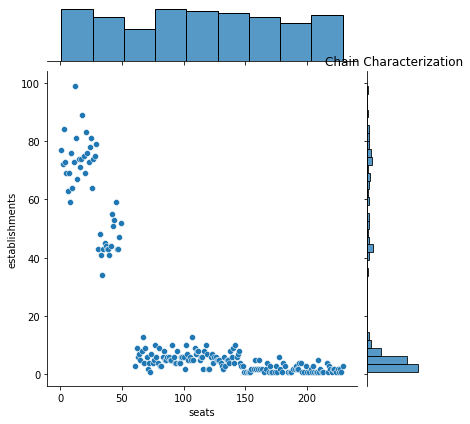

In [25]:
sns.jointplot(x="seats", y="establishments", data=rest_chains_by_seats) 
plt.title('Chain Characterization')
plt.show()

From the figure above, it can be seen that chains with few establishments (<20) have a high number of seats (>50) and chains with many establishments (>40) have low number of seats (<50).
It seems that most of the chains are characterized by less establishments with high number of seats.

#### Determine the average number of seats for each type of establishments. On average, which type of establishments has the greatest number of seats?

In [44]:
type_by_seats = data.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values(by='number')
type_by_seats.columns = ['type' , 'avg_seats']
type_by_seats

,type,avg_seats
0,Bakery,21.773852
2,Cafe,25.000000
4,Pizza,28.459375
3,Fast Food,31.837711
1,Bar,44.767123
5,Restaurant,48.042316


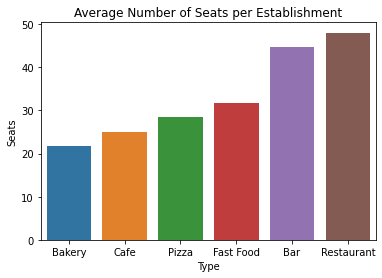

In [45]:
ax = sns.barplot(data=type_by_seats, x='type', y='avg_seats')
plt.title('Average Number of Seats per Establishment')
ax.set_xlabel('Type')
ax.set_ylabel('Seats')
plt.show()

On average, restaurants have the greatest amount of seats (~48 seats).

After resaurants, Bars have the highest average amount of seats(~45 seats).

Cafes have ~25 seats on average.

Bakeries, have the lowest number of seats (~21 seats).

#### Put the data on street names from the address column in a separate column

In [46]:
# method to extract only street name
def streetNames(street):
    street = street.split(',')[0].split(' ')[-1:]
    street = " ".join(street)
    return street
    
# extract only street names
data['street'] = data.clean_address_final.apply(streetNames)
data.head()

,id,object_name,address,chain,object_type,number,clean_address_check,clean_address_final,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK","3708 ROCK, Los Angeles,USA",ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD","100 WORLD, Los Angeles,USA",WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD","6801 HOLLYWOOD, Los Angeles,USA",HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET","1814 SUNSET, Los Angeles,USA",SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK","2100 PARK, Los Angeles,USA",PARK


#### Plot a graph of the top ten streets by number of restaurants.

In [47]:
rest_by_street = data.pivot_table(index='street', values='id', aggfunc='count').reset_index().sort_values(by='id', ascending=False)
rest_by_street.columns = ['street' , 'number_of_restaurants'] 
top_streets = rest_by_street.head(10)
top_streets

,street,number_of_restaurants
389,SUNSET,404
440,WILSHIRE,398
337,PICO,370
432,WESTERN,369
177,FIGUEROA,334
321,OLYMPIC,309
410,VERMONT,288
298,MONICA,264
23,3RD,263
224,HOLLYWOOD,253


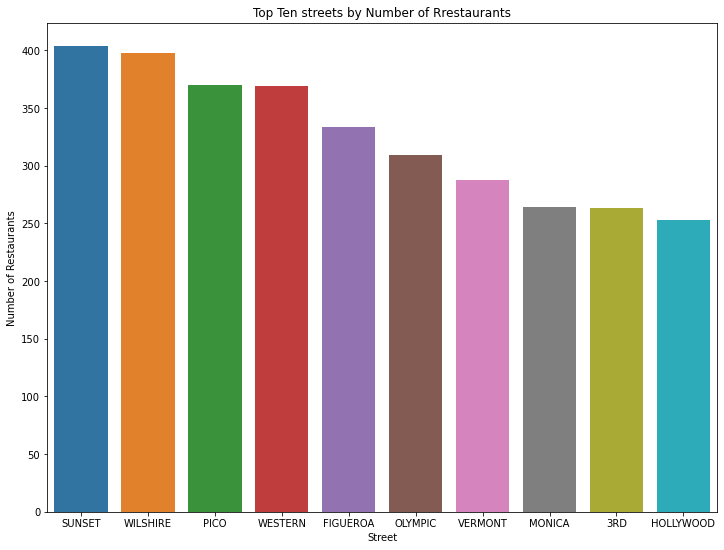

In [48]:
plt.figure(figsize=(12, 9))
ax = sns.barplot(data=top_streets, x='street', y='number_of_restaurants')
plt.title('Top Ten streets by Number of Rrestaurants')
ax.set_xlabel('Street')
ax.set_ylabel('Number of Restaurants')
plt.show()

The most popular streets for establishments are Sunset , Wilshire , Pico  and Western .

#### Find the number of streets that only have one restaurant.

In [49]:
one_rest = rest_by_street.query('number_of_restaurants == 1')

print('There are ' + str(len(one_rest )) + " with only one restaurant on them.")


There are 183 with only one restaurant on them.


There are 183 with only one restaurant on them.

#### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends cann be seen?

In [50]:
# calculate avg number of restaurants per street, extract only those greater than avg
avg_rests = rest_by_street['number_of_restaurants'].mean()
many_rest =  rest_by_street[ rest_by_street['number_of_restaurants'] > avg_rests]
print("The average number of seats is: ", round(many_rest['number_of_restaurants'].mean()))

The average number of seats is:  94


C:\Users\brsha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


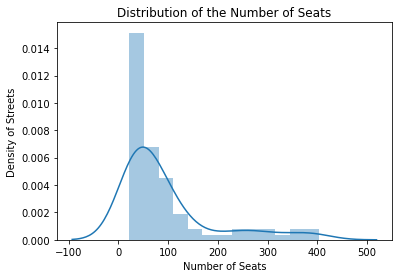

In [51]:
# plot distribution plot
ax = sns.distplot(many_rest['number_of_restaurants'])
ax.set_title('Distribution of the Number of Seats')
ax.set_xlabel('Number of Seats')
ax.set_ylabel('Density of Streets')
plt.show()

The avarege number of seats for streets with a lot of establishments is 94 seats.
From the figure above, for streets with a lot of establishments , most of those establishments have less than 100 seats (~50 seats). 

### 4. Conclusion and Recommendations 

- The most popular establishments in the LA area are restaurants(over 75%).
-  62% of the establishments are non-chain estabilshments, while 38% of the establishments are chains.
- Restauratns are most likely to be a chain. 
- Chains with few establishments (<20) have higher number of seats (>50) than chains with many establishments (>40).
- On average, restaurants have the greatest amount of seats  with 48 seats. After resaurants, Bars have the highest average       amount of seats with 45 seats. Bakeries, have the lowest number of seats of 21 seats.
- The streets in LA with the most food establishments on them are: Sunset , Wilshire , Pico  and Western.
- The establishments that are on these most popular streets have mostly anywhere between 94 seats in average.

#### Recommendation:
According to our goal (open a small robot-run cafe in Los Angeles) it can be reccomended to open a small cafe with 20-30 seats, since this is most popular size of the cafe in LA. The best location for the cafe is one of the  popular street, since  these streets have a good location and hight human traffic. 61% of cafe are chains , therefore it can be recommended to consider opening a chain.